<a href="https://colab.research.google.com/github/zakidpsdu/Multivariate-Analysis/blob/main/hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7

Return an ipython notebook and python streamlit app with the following:

0. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression. Check your function versus one of the prewritten ones. Include this in code cells of your ipython notebook.
1. Using Python and basic numpy functions, fit a linear regression model to the kirby 21 dataset into colab for the left telencelphalon (predictor) to the right telencephalon (outcome). Also, do the same reversing the predictor and response relationship. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right. Do not hold out any data (there's only 21 observations).
2. Consider a regression through the origin model  Y=BX . What would be the impact on the estimate of  B  if we replaced  X  by  cX  where  c  is a positive constant? Write your answer in a markdown cell of your ipython notebook.
3. Let  $X_i$  be a group indicator so that $x_i=I(i\in G_1)$
I.e. takes the value  1  when  $i$  is in group 1 and 0 if  i  is in group 0. Consider optimizing $\sum_i \frac{1}{n}(Y_i − \beta_0 - \beta_1 X_i)^2$.
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$, argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. You can either make a text argument in a markdown cell, or create a simulated example and show that the results holds.
4. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation.
5. Consider the logistic curve
$$
f(x) = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1 x}}.
$$
Use streamlit to create a web page that shows the impact of changing $\beta_0$ and $\beta_1$. That is, it takes in two inputs, as sliders, $\beta_0$ and $\beta_1$, and plots the resulting logistic curve. Your file should be a single python file.

# Question 0: Write a python function that takes an X and Y vector and returns an estimated  𝛽0  and  𝛽1  from linear regression. Check your function versus one of the prewritten ones. Include this in code cells of your ipython notebook.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def estimate_beta(X, Y):
    X = np.vstack([np.ones(len(X)), X]).T

    beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    return round(beta[0], 2), round(beta[1], 2)


# example data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 5, 7, 10])

estimate_beta(X, Y)


(np.float64(-0.6), np.float64(2.0))

In [ ]:
# check with sklearn
model = LinearRegression(fit_intercept=True)
model.fit(X.reshape(-1, 1), Y)
sklearn_beta0 = round(model.intercept_, 2)
sklearn_beta1 = round(model.coef_[0], 2)
print(sklearn_beta0, sklearn_beta1)

-0.6 2.0


##Question 1: Using Python and basic numpy functions, fit a linear regression model to the kirby 21 dataset into colab for the left telencelphalon (predictor) to the right telencephalon (outcome). Also, do the same reversing the predictor and response relationship. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right. Do not hold out any data (there's only 21 observations)

In [ ]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
dat.head(4)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519


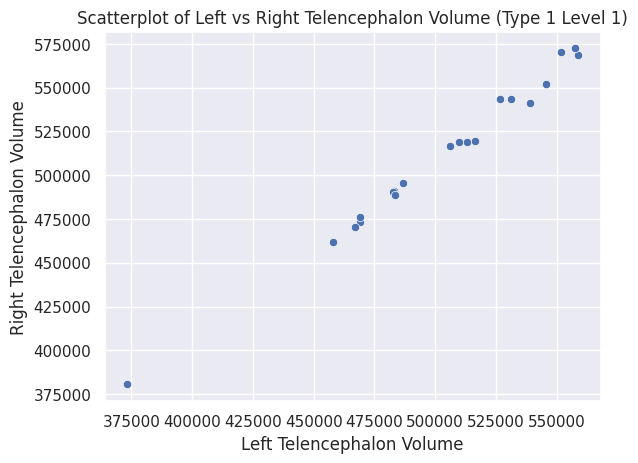

In [ ]:
telencephalon_data = dat[(dat['type'] == 1) & (dat['level'] == 1) & (dat['roi'].isin(['Telencephalon_L', 'Telencephalon_R']))]

telencephalon_volumes = telencephalon_data.pivot_table(index='id', columns='roi', values='volume')

sns.scatterplot(x='Telencephalon_L', y='Telencephalon_R', data=telencephalon_volumes)
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')
plt.title('Scatterplot of Left vs Right Telencephalon Volume (Type 1 Level 1)')
plt.show()

##Question 2: Consider a regression through the origin model Y=BX . What would be the impact on the estimate of B if we replaced X by cX where c is a positive constant?
Replacing X with a value equivalent to cX would result in scaling the output by the constant C. Since the regression is through the origin, the regression will continue to start from 0,0. Introducting constant C will affect the slope of the regression, in a multiplicative manner. The

##Question 3: Y^=β^0+β^1X in the scenario where X=1 or X=0

For X=1 Y^=β^0+β^1(1) therefore Y^ = B0 + B1 when X=1

For X= 0 Y^=β^0+β^1(0) therefore Y^ = B0 when X=0


# Question 4: Argue that if you take the vectors  𝑌  and  𝑋  and divide them by their standard deviations (respectively), the slope for either regressing  𝑌  on  𝑋  or  𝑋  on  𝑌  is simply the correlation.

Let X' be standardized X (X divide by SD of X), and Y' be standardized Y (Y divide by SD of Y). If we regress Y on X, the formula for slope is COV(X',Y')/Var(X') = COV(X,Y)/(SD(X)SD(Y))/1 = COR(X,Y) = r, which is the correlation coefficient, since Variance of standardized vector is 1.

In the same way, if we regress X on Y, the formula for slope is COV(X',Y')/Var(Y') = COV(X,Y)/(SD(X)SD(Y))/1 = COR(X,Y) = r. Thus the slope for either regression direction is simply the correlation.

# Question 5: streamlit app

In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, beta0, beta1):
    return np.exp(beta0 + beta1*x) / (1 + np.exp(beta0 + beta1*x))


st.title("Logistic Curve Explorer")

beta0 = st.slider("beta0 (intercept)", -10.0, 10.0, 0.0)
beta1 = st.slider("beta1 (coefficient)", -10.0, 10.0, 1.0)


x = np.linspace(-10, 10, 200)
y = logistic(x, beta0, beta1)


fig, ax = plt.subplots()
ax.plot(x, y, label="Logistic Curve")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title(f"beta0 = {beta0}, beta1 = {beta1}")
ax.set_ylim([0, 1])
ax.legend()

st.pyplot(fig)